In [6]:
import pandas as pd
from pandas_datareader import data as web # Package and modules for importing data.S
import datetime

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#stock prices over the past year, starting at January 1, 2017
start = datetime.datetime(2017,1,1)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


2y
2y
2y
2y
2y
                AAPL      AMZN      BABA        FB      GOOG
date                                                        
2017-01-03  1.000000  1.000000  1.000000  1.000000  1.000000
2017-01-04  0.998881  1.004657  1.021558  1.015660  1.000967
2017-01-05  1.003960  1.035533  1.065124  1.032603  1.010024
2017-01-06  1.015153  1.056152  1.059707  1.056050  1.025453
2017-01-09  1.024451  1.057386  1.069074  1.068800  1.026090


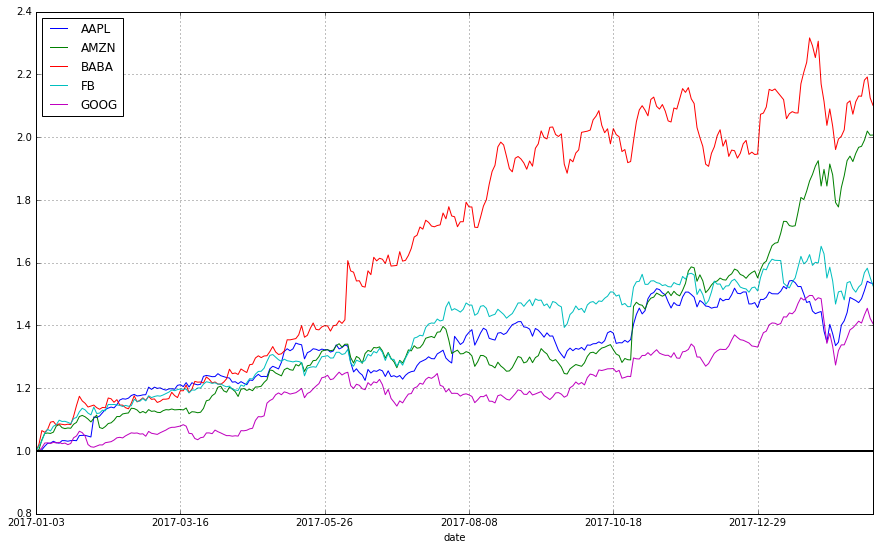

In [8]:
# GAFAA
google = web.DataReader('GOOG', 'iex', start, end)
apple = web.DataReader('AAPL', 'iex', start, end)
facebook = web.DataReader('FB', 'iex', start, end)
amazon = web.DataReader('AMZN', 'iex', start, end)
alibaba = web.DataReader('BABA', 'iex', start, end)

gafaa_stocks = pd.DataFrame({"GOOG": google["close"],
                       "AAPL": apple["close"],
                       "FB": facebook["close"],
                       "AMZN": amazon["close"],
                       "BABA": alibaba["close"]})

gafaa_stock_return = gafaa_stocks.apply(lambda x: x / x[0])
print(gafaa_stock_return.head())

gafaa_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
2y
                CRSP      EDIT      NTLA      SGMO
2017-01-03  1.000000  1.000000  1.000000  1.000000
2017-01-04  1.046667  1.085681  1.039318  1.129032
2017-01-05  1.020444  1.028756  1.025964  1.112903
2017-01-06  1.001778  1.027582  1.029674  1.177419
2017-01-09  1.017333  1.079225  1.060831  1.193548


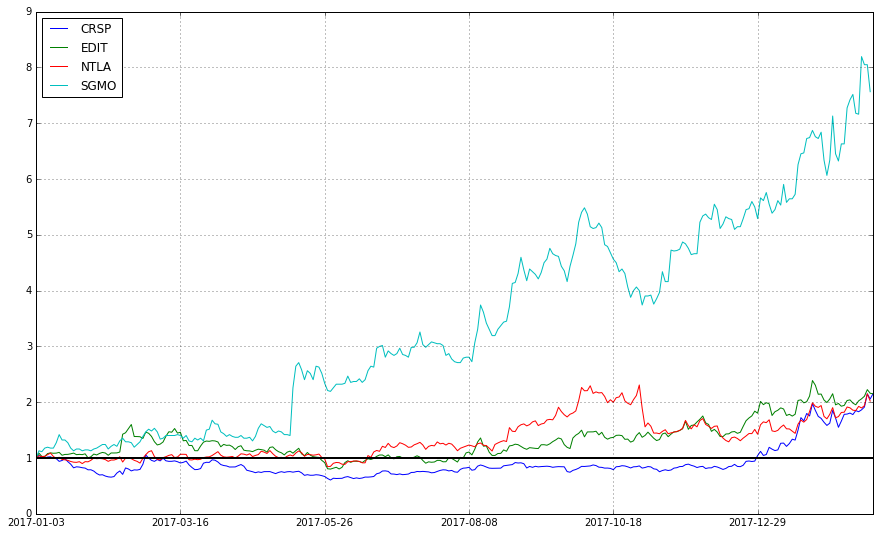

In [7]:
# GENE
editas = web.DataReader('EDIT', 'iex', start, end)
intellia = web.DataReader('NTLA', 'iex', start, end)
crispr = web.DataReader('CRSP', 'iex', start, end)
sangamo = web.DataReader('SGMO', 'iex', start, end)

gene_stocks = pd.DataFrame({"EDIT": editas["close"],
                       "NTLA": intellia["close"],
                       "CRSP": crispr["close"],
                       "SGMO": sangamo["close"]})

gene_stock_return = gene_stocks.apply(lambda x: x / x[0])
print(gene_stock_return.head())
gene_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)